In [49]:
import numpy as np
import matplotlib.pylab as plt
from PyAstronomy import pyasl



##Create data with a Gaussian absoprtion line

wvl1,flux1 = np.loadtxt("C:\\Users\\pirat\\Research\\SOSA\\SS\\6700.txt",unpack= True)
wvl2,flux2 = np.loadtxt("C:\\Users\\pirat\\Research\\SOSA\\SS\\5200.txt",unpack= True)
bwvl, bflux = np.loadtxt("C:\\Users\\pirat\\Research\\SOSA\\Binaries\\HIP109303\\109303a16.txt",unpack = True)

# # Apply the fast algorithm and ...
# bfast = pyasl.fastRotBroad(wvl, flux, 0.0, 50)



def MakingCombinations(LeftSS,RightSS,wav_binary,flux_binary,delta_weight):
    '''
    Input: {(Left SS Temp,L Epsilon,L vsini) : [wavelength,flux]}, {(Right SS Temp,R Epsilon, R vsini) : [wavelength,flux]}, {wavelengths of binary : flux of binary}, incredment for the weight 
    Output: {(Left SS Temp, L Weight, L Epsilon, L vsini, Right SS Temp, R Weight, R Epsilon, R vsini) : Standard deviation from the observed spectra}
    '''
    combinations={}
    weightrange = np.arange(delta_weight,100,delta_weight)
    for LeftStarDetails in LeftSS:
        leftTemp = LeftStarDetails[0]
        leftEpsilon = LeftStarDetails[1]
        leftVsini = LeftStarDetails[2]
        for RightStarDetails in RightSS:
            rightTemp = RightStarDetails[0]
            rightEpsilon = RightStarDetails[1]
            rightVsini = RightStarDetails[2]
            wav_sum=(LeftSS[leftTemp][0]+RightSS[rightTemp][0])/2
            indexINTOsum=np.where(np.isin(wav_sum,wav_binary))
            indexINTObinary=np.where(np.isin(wav_binary,wav_sum)) 
            for weight in weightrange:
                weight=float(weight)
                leftWeighted=LeftSS[leftTemp][1]*weight/100.
                rightWeighted=RightSS[rightTemp][1]*(100.-weight)/100.
                flux_sum=(leftWeighted + rightWeighted)/2
                combinations[((leftTemp,weight/100.,leftEpsilon,leftVsini,rightTemp,(100.-weight)/100.,rightEpsilon,rightVsini))]=(flux_sum[indexINTOsum]/flux_binary[indexINTObinary]).std()  
    return combinations 

#Where to put the vsini in SOSA: 1) Inside the possible combinations function
#All the SS need to be broadened before the go into possible combinations 

def LineBroadening(SSwav,SSflux,epsilon,vsini):
    '''
    Input: Synethic Spectra's wavelength (regularly spaced,numpy array), Synethic Spectra's flux (numpy array), epsilon(float), vsini(float)
    Output: Inputed wavelength, Line Broadened flux (Both numpy array) 
    Using:  pyasl.fastRotBroad from the PyAstronomy package 
    '''
    return SSwav, pyasl.fastRotBroad(SSwav, SSflux , epsilon , vsini)
 
 

wvl, bfast = LineBroadening(wvl1-2,flux1,0.2,75.)
wvl2,bfast2 = LineBroadening(wvl2-3,flux2,0.2,75.)




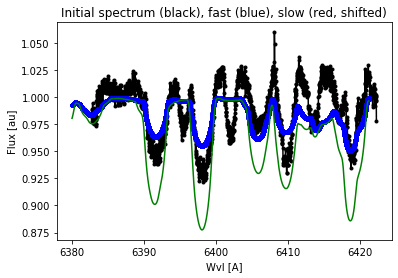

In [50]:


plt.xlabel("Wvl [A]")
plt.ylabel("Flux [au]")
plt.title("Initial spectrum (black), fast (blue), slow (red, shifted)")
plt.plot(bwvl, bflux, 'k.-')
plt.plot(wvl[2000:len(wvl)-1700], bfast[2000:len(wvl)-1700], 'b.-')
plt.plot(wvl2[2000:len(wvl2)-1700],bfast2[2000:len(wvl2)-1700],"g")
plt.show()


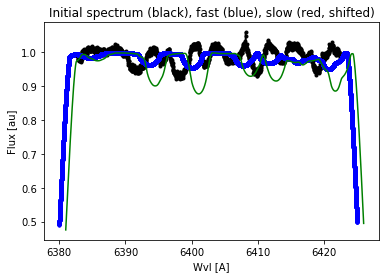

In [38]:
plt.xlabel("Wvl [A]")
plt.ylabel("Flux [au]")
plt.title("Initial spectrum (black), fast (blue), slow (red, shifted)")
plt.plot(bwvl, bflux, 'k.-')
plt.plot(wvl, bfast, 'b.-')
plt.plot(wvl2,bfast2,"g")
plt.show()
